In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Options d'affichage
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [ ]:
# Charger le fichier CSV (assure-toi qu'il est bien dans le dossier data/)
data_path = "Dataa.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError(f"Le fichier {data_path} est introuvable.")

data = pd.read_csv(data_path)
print(f" Données chargées : {data.shape[0]} lignes et {data.shape[1]} colonnes.")
data.head()


In [ ]:
# Aperçu global
data.info()

# Vérifier les valeurs manquantes
print("\nValeurs manquantes :")
print(data.isna().sum())

# Statistiques descriptives
data.describe(include="all")


In [ ]:
# Gérer les valeurs manquantes
# Pour les colonnes numériques, on remplace par la moyenne
for col in ['Courier_Experience_yrs']:
    if col in data.columns and data[col].isnull().any():
        mean_val = data[col].mean()
        data[col] = data[col].fillna(mean_val)
        print(f"Valeurs manquantes dans '{col}' remplacées par la moyenne : {mean_val:.2f}")

# Pour les colonnes catégorielles, on remplace par le mode
for col in ['Weather', 'Traffic_Level', 'Time_of_Day']:
    if col in data.columns and data[col].isnull().any():
        mode_val = data[col].mode()[0]
        data[col] = data[col].fillna(mode_val)
        print(f"Valeurs manquantes dans '{col}' remplacées par le mode : {mode_val}")

# Vérifier à nouveau les valeurs manquantes
print("\nNouvelles valeurs manquantes :")
print(data.isna().sum())

In [ ]:
#Vérification des colonnes, Définis la variable cible
print("Colonnes disponibles :", list(data.columns))
target = "Delivery_Time_min"
print(f" Variable cible définie : {target}")


In [ ]:
# Heatmap des corrélations (variables numériques)
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables numériques")
plt.show()


In [ ]:
#Countplots (variables catégorielles)
categorical_features = ["Traffic_Level", "Vehicle_Type", "Time_of_Day", "Weather"]

for feature in categorical_features:
    if feature in data.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=feature, data=data)
        plt.title(f"Distribution de {feature}")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"La colonne '{feature}' est absente du DataFrame.")


In [ ]:
#Boxplots (relation entre catégorie et temps de livraison)
for feature in categorical_features:
    if feature in data.columns and target in data.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=feature, y=target, data=data)
        plt.title(f"{feature} vs {target}")
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
#Analyse rapide
# Exemple : corrélation simple entre Distance et temps de livraison
if "Distance_km" in data.columns and target in data.columns:
    sns.scatterplot(x="Distance_km", y=target, data=data)
    plt.title("Distance vs Temps de livraison")
    plt.show()


In [ ]:
#Distribution de la variable cible
plt.figure(figsize=(6,4))
sns.histplot(data[target], kde=True, bins=30)
plt.title(f"Distribution de la variable cible : {target}")
plt.xlabel(target)
plt.show()


In [ ]:
#Relation distance / temps de livraison
if "Distance_km" in data.columns and target in data.columns:
    sns.scatterplot(x="Distance_km", y=target, data=data)
    plt.title("Distance vs Temps de livraison")
    plt.show()


In [ ]:
#Détection d’outliers (valeurs extrêmes)
plt.figure(figsize=(6,4))
sns.boxplot(x=data[target])
plt.title(f"Détection des outliers de {target}")
plt.show()


Prétraitement (StandardScaler pour numérique, OneHotEncoder pour catégoriel)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression


df = pd.read_csv("Dataa.csv") 

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)  # categorical
    else:
        df[col].fillna(df[col].mean(), inplace=True)     # numerical




C:\Users\dickson\AppData\Local\Temp\ipykernel_23576\4045821651.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)     # numerical
C:\Users\dickson\AppData\Local\Temp\ipykernel_23576\4045821651.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [5]:
# Detect and remove outliers (IQR method)
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])





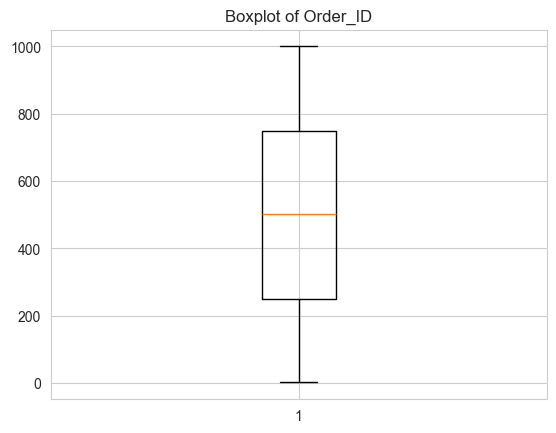

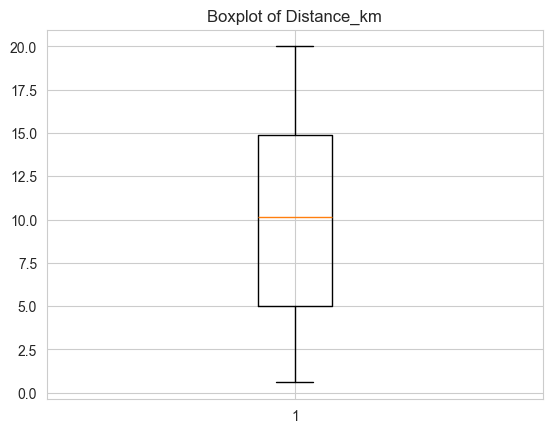

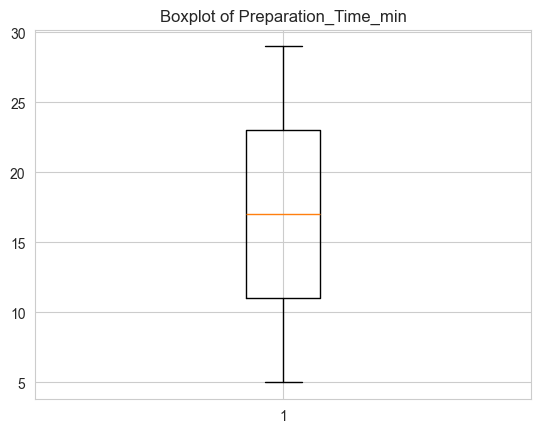

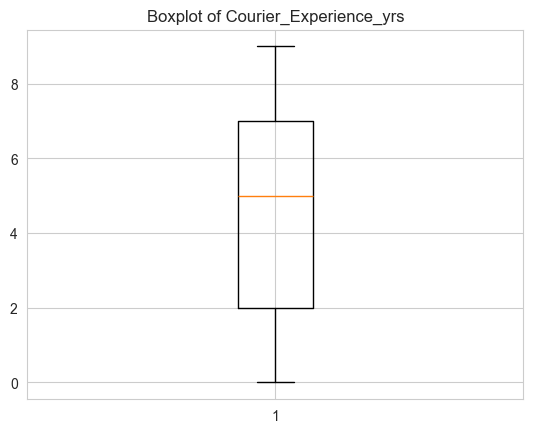

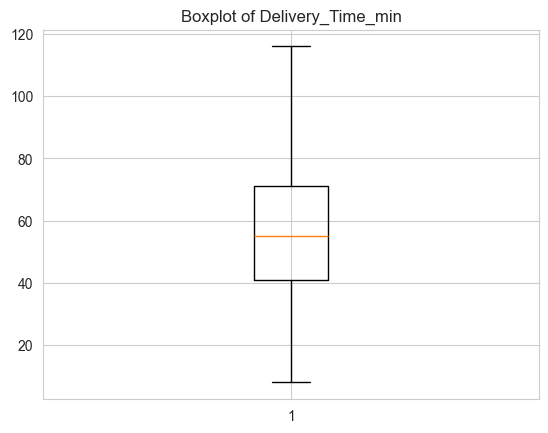

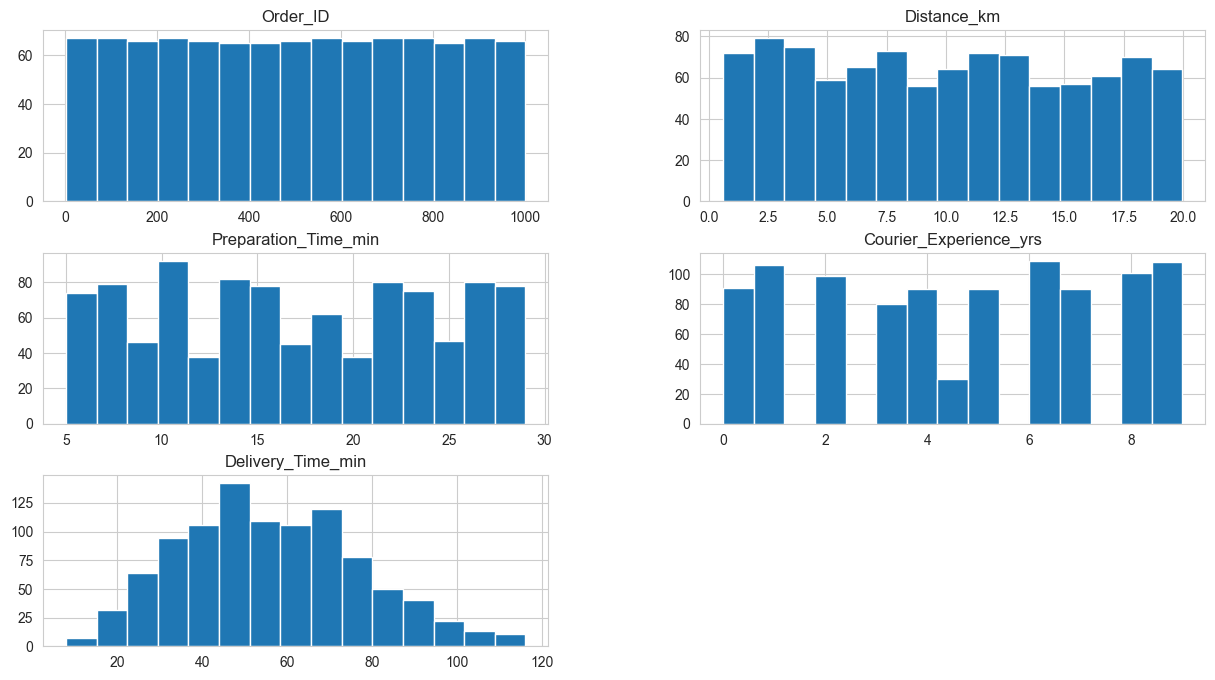

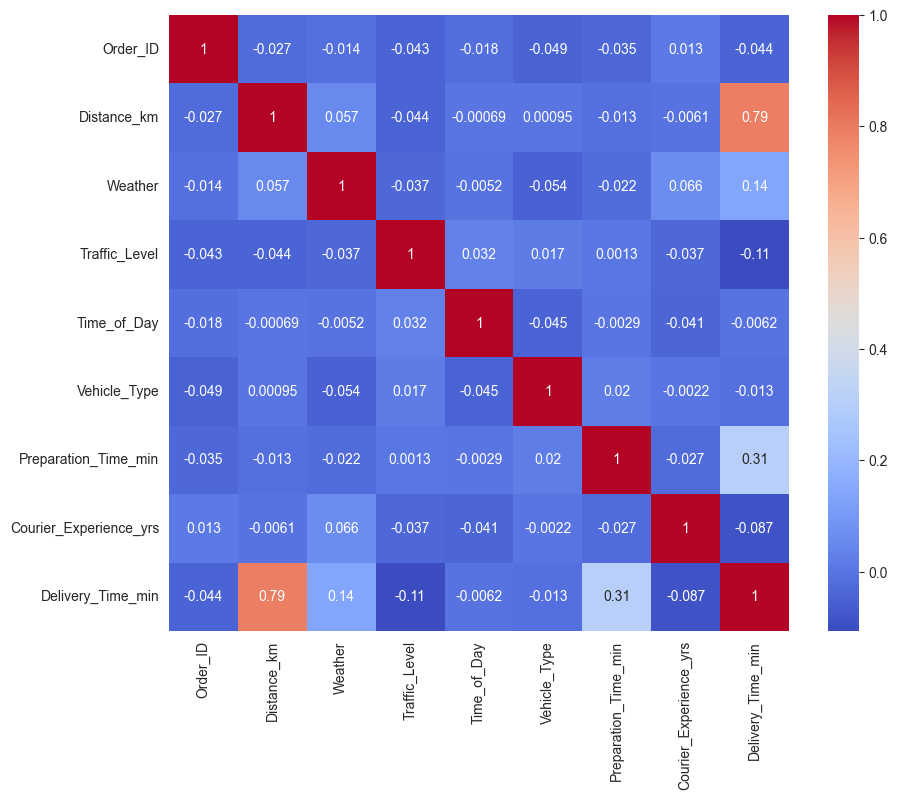

In [6]:
# Quick EDA visuals
# Boxplots for numerical columns
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Histogram of numerical columns
df[num_cols].hist(bins=15, figsize=(15,8))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



In [9]:
# Feature selection (SelectKBest + f_regression)
# Replace 'target' with your target column name
target_col = 'Delivery_Time_min'
X = df.drop(target_col, axis=1)
y = df[target_col]

# Select top 5 features
selector = SelectKBest(score_func=f_regression, k=4)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

print("Preprocessing, EDA, and feature selection completed!")

Selected features: ['Distance_km', 'Weather', 'Traffic_Level', 'Preparation_Time_min']
Preprocessing, EDA, and feature selection completed!
